Deber N°2: Ejercicio 5.9.2 Map of Science

María Fernanda Minango

Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  Ubicación Geográfica de Países - Google Developer. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  
Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

en el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
la figura tiene etiquetas adecuadas en los ejes de la visualización. 
se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [9]:
#Se importan las librerias que se van a utilizar
import math 
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv

In [10]:
# Se abre el articvo tipo texto con la información a trabajar
with open("pubmed-breastcanc-set.txt", encoding= 'utf-8') as f:
    my_text = f.read()

In [11]:
# Se realiza la busqueda del patron para encontrar los países
paises = re.sub(r'\n\s{6}', ' ', my_text)
datos = re.findall(r'\,\s([A-zA-Z]{2,11})\.', paises)
#print(datos)
#print('Los 10 primeros caracteres de la lista de países son: ', datos[:10])

In [12]:
#Se realiza el ordenamiento de datos
unique_datos = list(datos)
unique_datos.sort()
#print(unique_datos)

In [13]:
# Se abre el archivo tipo texto para las coordenadas
datos = pd.read_csv('Coordenadas de los países.txt', engine='python', skipfooter=3)
datos.head(6)

,Country,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania


In [7]:
# Los datos para la grafica son obtenidos
nombre = datos[datos.Name.isin(unique_datos)]
paisesdat = datos[datos.Country.isin(unique_datos)]
completo = pd.concat([nombre,paisesdat]).drop_duplicates().sort_values('Name')

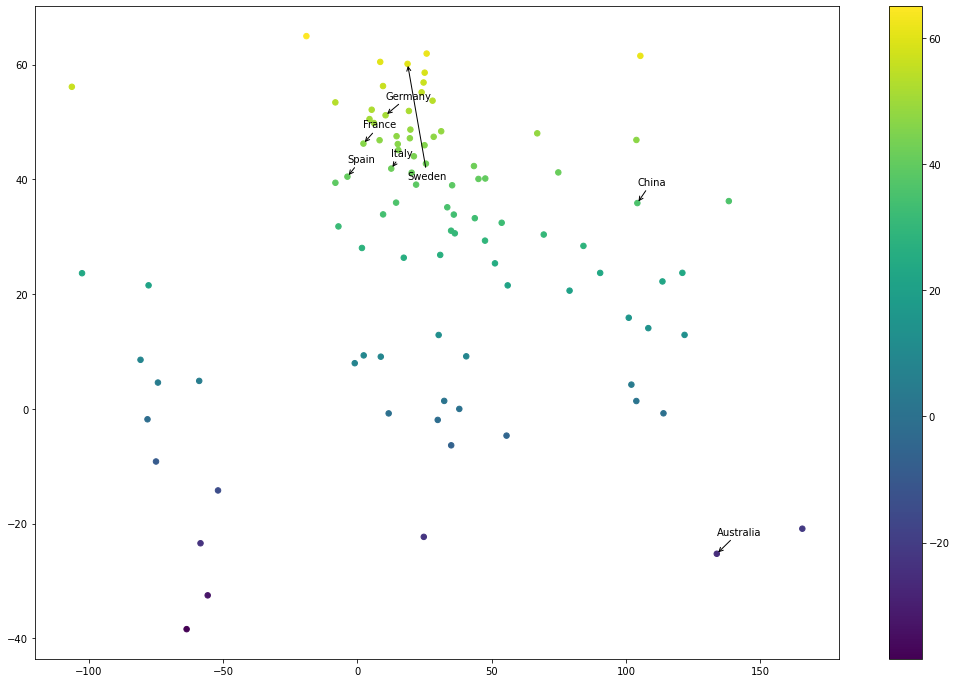

In [8]:
# Se grafica utilizando los daos obtenido previamente
import matplotlib.pyplot as plt
plt.scatter(completo.Longitude, completo.Latitude, s=30, c=completo.Latitude)
plt.colorbar()

ard = dict(arrowstyle="->")
# Se escogieron los paises más repetidos para que sean representativos en el grafico
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('Sweden', xy = (18.643501, 60.128161), 
               xytext = (18.643501, 40), arrowprops = ard)
plt.annotate('Italy', xy = (12.56738, 41.87194), 
               xytext = (12.56738, 44), arrowprops= ard)
plt.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('Germany', xy = (10.451526, 51.165691), 
               xytext = (10.451526, 54), arrowprops= ard)
plt.annotate('France', xy = (2.213749, 46.227638), 
               xytext = (2.213749, 49), arrowprops= ard)
plt.annotate('Spain', xy = (-3.74922, 40.463667), 
               xytext = (-3.74922, 43), arrowprops= ard)

# Se ajustan los paramtetros para graficar los datos
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show() 